# Imports

In [3]:
import numpy as np
import pandas as pd
import xarray as xr

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

import shap

# Reading in data - epa dataset

In [4]:
epa = pd.read_csv('/Users/katherinemottola/Desktop/important/school/GEOL599/1_24_24/LA_AQS_2023.csv')

# Making individual dfs of each variable with 1 hour duration

In [5]:
## want to make a df with all available parameters

# ozone

dfo3 = epa[(epa['Parameter Name']=='Ozone') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_o3 = dfo3["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfo3 = pd.DataFrame(data = {"O3" : mean_o3, 'date' : dfo3["Date (Local)"]})

In [6]:
# b press

dfbar = epa[(epa['Parameter Name']=='Barometric pressure') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_bar = dfbar["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfbar = pd.DataFrame(data = {"Barometric Pressure" : mean_bar, 'date' : dfbar["Date (Local)"]})

In [7]:
# CO

dfco = epa[(epa['Parameter Name']=='Carbon monoxide') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_co = dfco["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfco = pd.DataFrame(data = {"Carbon Monoxide" : mean_co, 'date' : dfco["Date (Local)"]})

In [8]:
# SO2

dfsul = epa[(epa['Parameter Name']=='Sulfur dioxide') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_sul = dfsul["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfsul = pd.DataFrame(data = {"Sulfur Dioxide" : mean_sul, 'date' : dfsul["Date (Local)"]})

In [9]:
# no2 

dfno2 = epa[(epa['Parameter Name']=='Nitrogen dioxide (NO2)') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_no2 = dfno2["Arithmetic Mean"]

# only date and mean 
dfno2 = pd.DataFrame(data = {"NO2" : mean_no2, 'date' : dfno2["Date (Local)"]})

In [10]:
# temp

dftemp = epa[(epa['Parameter Name']=='Outdoor Temperature') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_temp = dftemp["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dftemp = pd.DataFrame(data = {"Outdoor Temperature" : mean_temp, 'date' : dftemp["Date (Local)"]})

In [11]:
# humidity

dfhum = epa[(epa['Parameter Name']=='Relative Humidity') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_hum = dfhum["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfhum = pd.DataFrame(data = {"Relative Humidity" : mean_hum, 'date' : dfhum["Date (Local)"]})

In [12]:
# solar radiation

dfsun = epa[(epa['Parameter Name']=='Solar radiation') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_sun = dfsun["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfsun = pd.DataFrame(data = {"Solar Radiation" : mean_sun, 'date' : dfsun["Date (Local)"]})

In [13]:
# UV radiation

dfuv = epa[(epa['Parameter Name']=='Ultraviolet radiation') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_uv = dfuv["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfuv = pd.DataFrame(data = {"UV Radiation" : mean_uv, 'date' : dfuv["Date (Local)"]})

In [14]:
# Oxides of nitrogen (NOx)

dfnox = epa[(epa['Parameter Name']=='Oxides of nitrogen (NOx)') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_nox = dfnox["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfnox = pd.DataFrame(data = {"Oxides of Nitrogen" : mean_nox, 'date' : dfnox["Date (Local)"]})

In [15]:
# Wind Direction - Scalar

dfwds = epa[(epa['Parameter Name']=='Wind Direction - Scalar') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_wds = dfwds["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfwds = pd.DataFrame(data = {"Scalar Wind Direction" : mean_wds, 'date' : dfwds["Date (Local)"]})

In [16]:
# Wind Direction - Resultant

dfwdr = epa[(epa['Parameter Name']=='Wind Direction - Resultant') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_wdr = dfwdr["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfwdr = pd.DataFrame(data = {"Resultant Wind Direction" : mean_wdr, 'date' : dfwdr["Date (Local)"]})

In [17]:
# Wind Speed - Scalar

dfwss = epa[(epa['Parameter Name']=='Wind Speed - Scalar') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_wss = dfwss["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfwss = pd.DataFrame(data = {"Scalar Wind Speed" : mean_wss, 'date' : dfwss["Date (Local)"]})

In [18]:
# Wind Speed - Resultant

dfwsr = epa[(epa['Parameter Name']=='Wind Speed - Resultant') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_wsr = dfwsr["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfwsr = pd.DataFrame(data = {"Resultant Wind Speed" : mean_wsr, 'date' : dfwsr["Date (Local)"]})

In [19]:
# PM2.5 - Local Conditions

dfpm = epa[(epa['Parameter Name']=='PM2.5 - Local Conditions') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_pm = dfpm["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfpm = pd.DataFrame(data = {"PM2.5" : mean_pm, 'date' : dfpm["Date (Local)"]})

In [20]:
# Nitric oxide (NO)

dfno = epa[(epa['Parameter Name']=='Nitric oxide (NO)') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_no = dfno["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfno = pd.DataFrame(data = {"Nitric Oxide" : mean_no, 'date' : dfno["Date (Local)"]})

In [21]:
# NOy - NO

dfnoy = epa[(epa['Parameter Name']=='NOy - NO') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_noy = dfnoy["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfnoy = pd.DataFrame(data = {"Noy" : mean_noy, 'date' : dfnoy["Date (Local)"]})

In [22]:
# Reactive oxides of nitrogen (NOy)

dfrea = epa[(epa['Parameter Name']=='Reactive oxides of nitrogen (NOy)') & (epa['Duration Description']=='1 HOUR')]

# make a variable of only the mean 
mean_rea = dfrea["Arithmetic Mean"]

# now make a dataframe where its ONLY the columns of date and ozone 

dfrea = pd.DataFrame(data = {"Reactive Ox of Nitrogen" : mean_rea, 'date' : dfrea["Date (Local)"]})

# Merging the dfs into one big one 

In [23]:
df_o3_bar = dfo3.merge(dfbar, on=['date'])

df_o3_bar.head()

,O3,date,Barometric Pressure
0,0.031708,2023-01-01,997.291667
1,0.015792,2023-01-02,1004.458333
2,0.025000,2023-01-03,1007.000000
3,0.020500,2023-01-04,1008.083333
4,0.027375,2023-01-05,1008.125000


In [24]:
df_o3_bar_co = df_o3_bar.merge(dfco, on=['date'])

df_o3_bar_co.head()

,O3,date,Barometric Pressure,Carbon Monoxide
0,0.031708,2023-01-01,997.291667,0.170833
1,0.031708,2023-01-01,997.291667,0.176250
2,0.015792,2023-01-02,1004.458333,0.358333
3,0.015792,2023-01-02,1004.458333,0.324750
4,0.025000,2023-01-03,1007.000000,0.250000


In [25]:
df1 = df_o3_bar_co.merge(dfsul, on=['date'])
df2 = df1.merge(dfno2, on=['date'])
df3 = df2.merge(dftemp, on=['date'])
df4 = df3.merge(dfhum, on=['date'])
df5 = df4.merge(dfsun, on=['date'])
df6 = df5.merge(dfuv, on=['date'])
df7 = df6.merge(dfnox, on=['date'])
df8 = df7.merge(dfwds, on=['date'])
df9 = df8.merge(dfwdr, on=['date'])
df10 = df9.merge(dfwss, on=['date'])
df11 = df10.merge(dfwsr, on=['date'])
df12 = df11.merge(dfpm, on=['date'])
df13 = df12.merge(dfno, on=['date'])
df14 = df13.merge(dfnoy, on=['date'])
dfall = df12.merge(dfrea, on=['date'])

# Plots of variable vs ozone to look for visual correlation

<Axes: xlabel='O3', ylabel='Oxides of Nitrogen'>

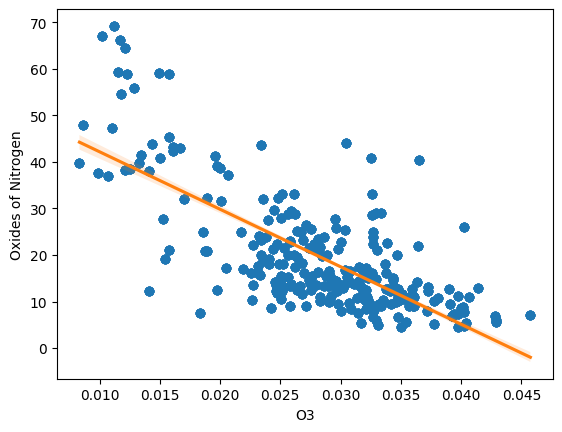

In [33]:
sns.regplot(data=dfall, x='O3', y='Oxides of Nitrogen', line_kws={"color": "C1"})

<Axes: xlabel='O3', ylabel='PM2.5'>

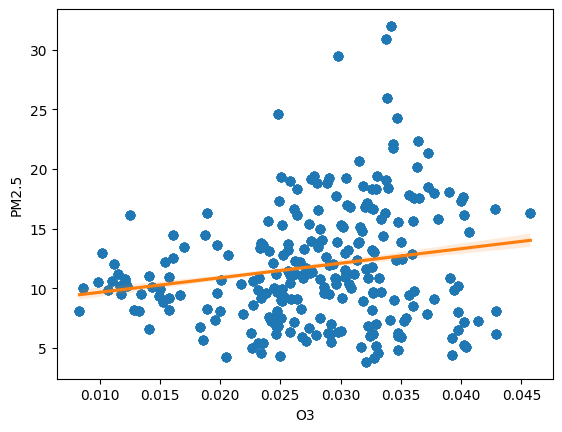

In [34]:
sns.regplot(data=dfall, x='O3', y='PM2.5', line_kws={"color": "C1"})

<Axes: xlabel='O3', ylabel='NO2'>

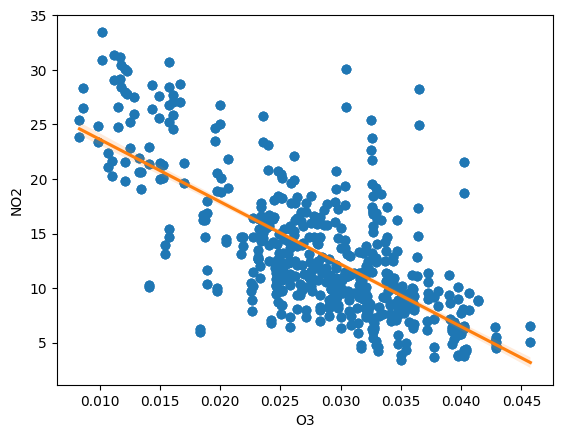

In [35]:
sns.regplot(data=dfall, x='O3', y='NO2', line_kws={"color": "C1"})

<Axes: xlabel='O3', ylabel='Resultant Wind Direction'>

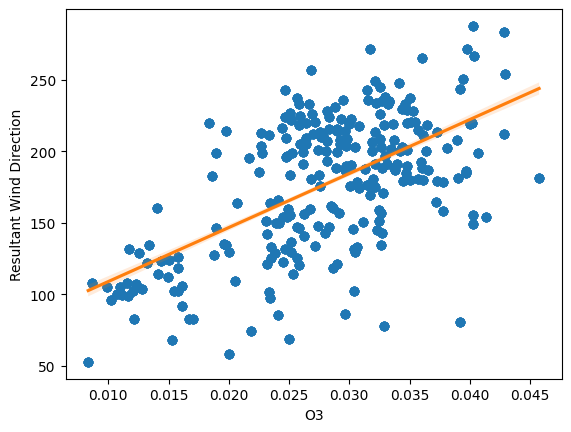

In [39]:
sns.regplot(data=dfall, x='O3', y='Resultant Wind Direction', line_kws={"color": "C1"})

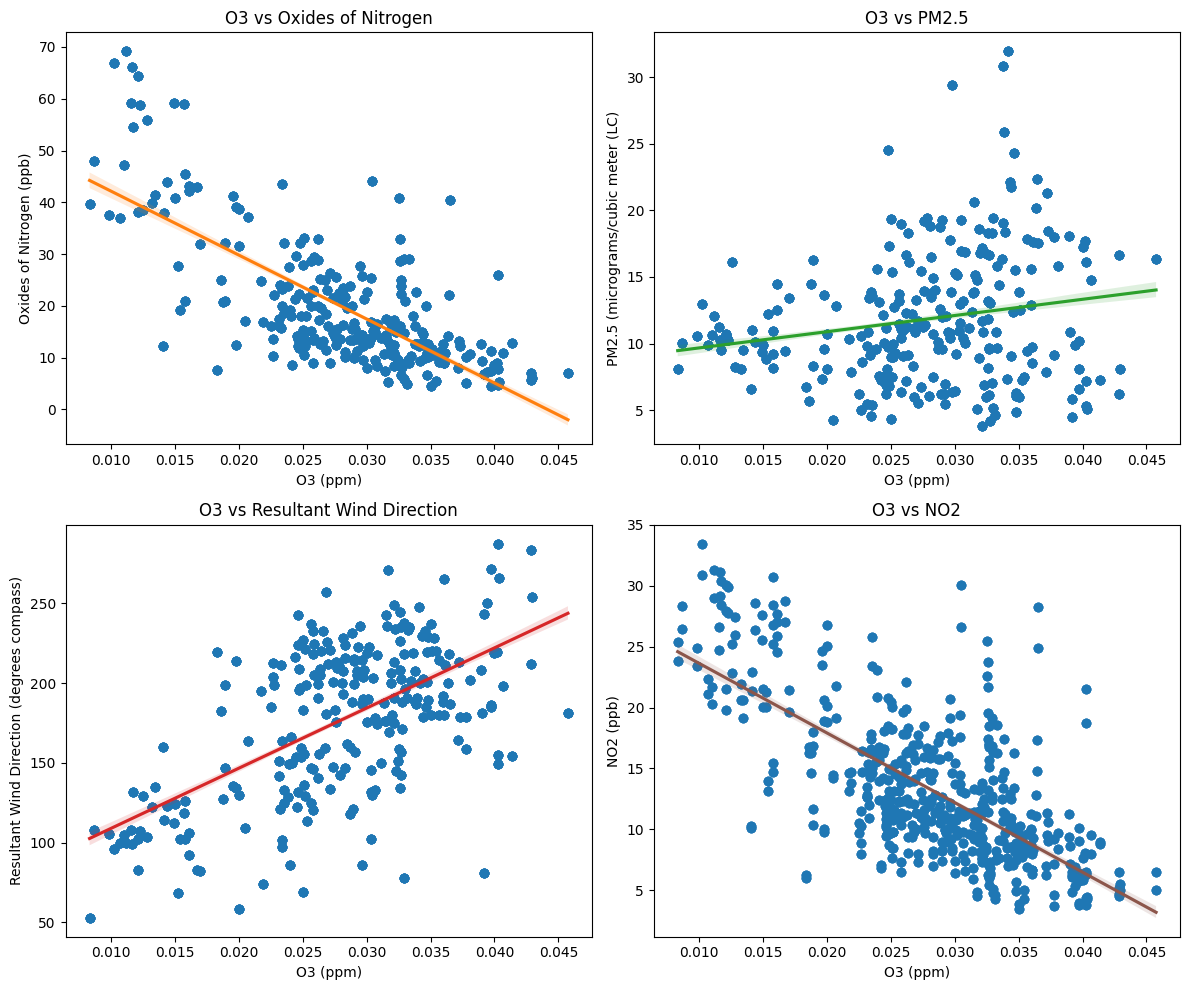

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ox of nitrogen
sns.regplot(data=dfall, x='O3', y='Oxides of Nitrogen', line_kws={"color": "C1"}, ax=axes[0, 0])
axes[0, 0].set_title('O3 vs Oxides of Nitrogen')
axes[0, 0].set_xlabel('O3 (ppm)')
axes[0, 0].set_ylabel('Oxides of Nitrogen (ppb)')


# pm
sns.regplot(data=dfall, x='O3', y='PM2.5', line_kws={"color": "C2"}, ax=axes[0, 1])
axes[0, 1].set_title('O3 vs PM2.5')
axes[0, 1].set_xlabel('O3 (ppm)')
axes[0, 1].set_ylabel('PM2.5 (micrograms/cubic meter (LC)')

# result wind
sns.regplot(data=dfall, x='O3', y='Resultant Wind Direction', line_kws={"color": "C3"}, ax=axes[1, 0])
axes[1, 0].set_title('O3 vs Resultant Wind Direction')
axes[1, 0].set_xlabel('O3 (ppm)')
axes[1, 0].set_ylabel('Resultant Wind Direction (degrees compass)')

# no2
sns.regplot(data=dfall, x='O3', y='NO2', line_kws={"color": "C5"}, ax=axes[1, 1])
axes[1, 1].set_title('O3 vs NO2')
axes[1, 1].set_xlabel('O3 (ppm)')
axes[1, 1].set_ylabel('NO2 (ppb)')

plt.tight_layout()
plt.show()


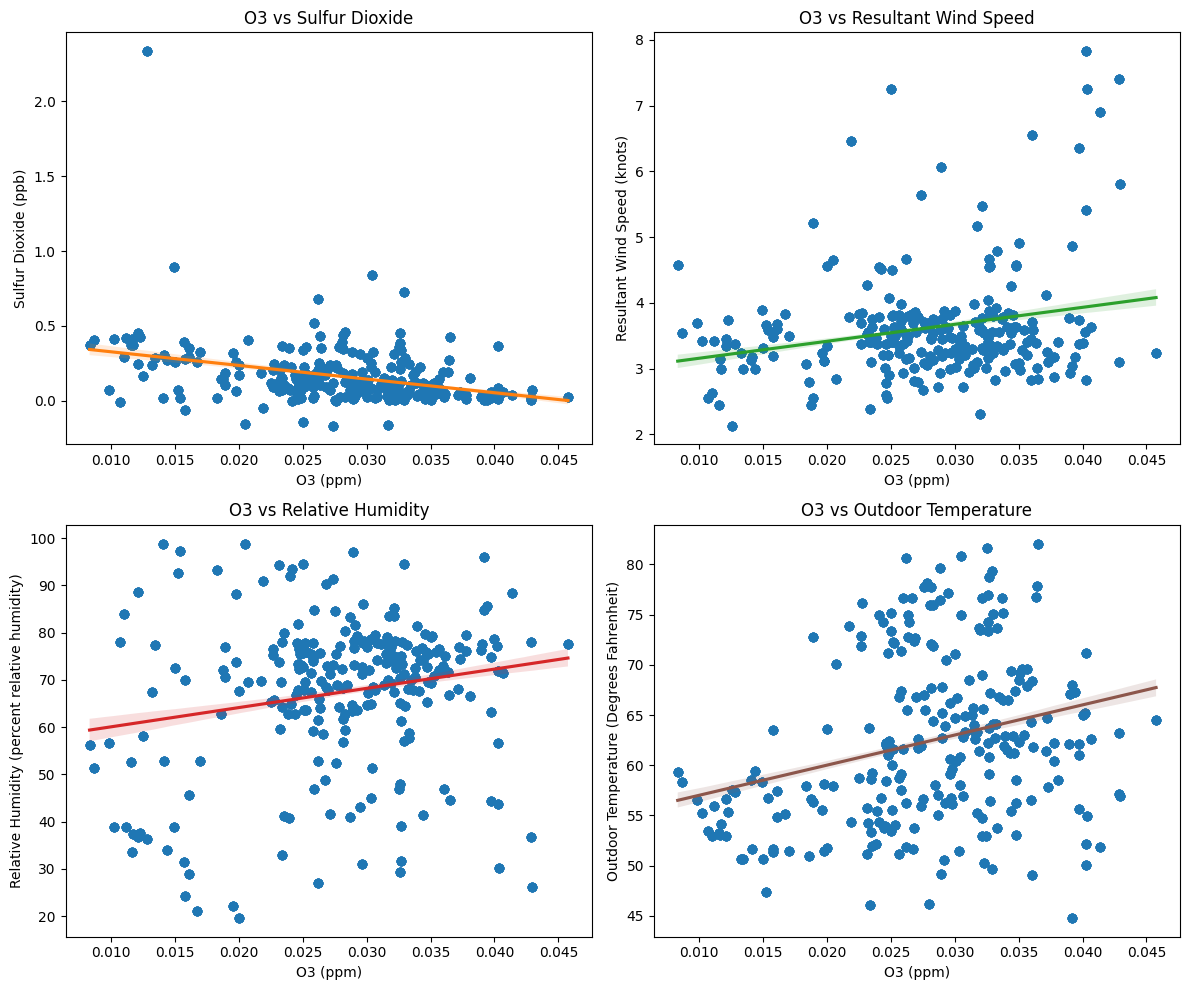

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ox of nitrogen
sns.regplot(data=dfall, x='O3', y='Sulfur Dioxide', line_kws={"color": "C1"}, ax=axes[0, 0])
axes[0, 0].set_title('O3 vs Sulfur Dioxide')
axes[0, 0].set_xlabel('O3 (ppm)')
axes[0, 0].set_ylabel('Sulfur Dioxide (ppb)')


# pm
sns.regplot(data=dfall, x='O3', y='Resultant Wind Speed', line_kws={"color": "C2"}, ax=axes[0, 1])
axes[0, 1].set_title('O3 vs Resultant Wind Speed')
axes[0, 1].set_xlabel('O3 (ppm)')
axes[0, 1].set_ylabel('Resultant Wind Speed (knots)')

# result wind
sns.regplot(data=dfall, x='O3', y='Relative Humidity', line_kws={"color": "C3"}, ax=axes[1, 0])
axes[1, 0].set_title('O3 vs Relative Humidity')
axes[1, 0].set_xlabel('O3 (ppm)')
axes[1, 0].set_ylabel('Relative Humidity (percent relative humidity)')

# no2
sns.regplot(data=dfall, x='O3', y='Outdoor Temperature', line_kws={"color": "C5"}, ax=axes[1, 1])
axes[1, 1].set_title('O3 vs Outdoor Temperature')
axes[1, 1].set_xlabel('O3 (ppm)')
axes[1, 1].set_ylabel('Outdoor Temperature (Degrees Fahrenheit)')

plt.tight_layout()
plt.show()


# Making arrays of the variables so I can do the actual training

In [25]:
X = dfall[['Barometric Pressure','Carbon Monoxide','Sulfur Dioxide', 'NO2', 'Outdoor Temperature', \
            'Relative Humidity', 'Solar Radiation', 'UV Radiation', 'Oxides of Nitrogen', 'Scalar Wind Direction', \
            'Resultant Wind Direction','Scalar Wind Speed','Resultant Wind Speed','PM2.5', 'Reactive Ox of Nitrogen']].copy()
X = X.to_numpy()
X

array([[ 9.97291667e+02,  1.70833000e-01, -1.58333000e-01, ...,
         5.16666700e+00,  5.08750000e+00,  4.70000000e+00],
       [ 9.97291667e+02,  1.70833000e-01, -1.58333000e-01, ...,
         5.16666700e+00,  5.08750000e+00,  4.70000000e+00],
       [ 9.97291667e+02,  1.70833000e-01, -1.58333000e-01, ...,
         5.16666700e+00,  5.08750000e+00,  4.70000000e+00],
       ...,
       [ 1.00012500e+03,  2.00000000e-01,  2.50000000e-02, ...,
         3.87083300e+00,  6.41666700e+00,  4.72500000e+00],
       [ 1.00012500e+03,  2.00000000e-01,  2.50000000e-02, ...,
         3.87083300e+00,  6.41666700e+00,  4.72500000e+00],
       [ 1.00012500e+03,  2.00000000e-01,  2.50000000e-02, ...,
         3.87083300e+00,  6.41666700e+00,  4.72500000e+00]])

In [26]:
y = dfall['O3'].copy()
y = y.to_numpy()
y

array([0.031708, 0.031708, 0.031708, ..., 0.030042, 0.030042, 0.030042])

# Train test val splits

In [27]:
# training and remaining instead of train and test, remaining will be what i then pull the next stuff from
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4)

# now i can split the remaining data into the testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5)


# X_temp_train is training data, X_test as testing data, X_val is validation data
# y_temp_train is training data, y_test as testing data, y_val is validation data


# Making separate dfs to store the predictions for each split

In [28]:
colz = ['Barometric Pressure','Carbon Monoxide','Sulfur Dioxide', 'NO2', 'Outdoor Temperature', \
        'Relative Humidity', 'Solar Radiation', 'UV Radiation', 'Oxides of Nitrogen', 'Scalar Wind Direction', \
        'Resultant Wind Direction','Scalar Wind Speed','Resultant Wind Speed','PM2.5', 'Reactive Ox of Nitrogen']

Train_df = pd.DataFrame(X_train, columns=colz)
Train_df['O3 (from y_train)'] = y_train

Test_df = pd.DataFrame(X_test, columns=colz)
Test_df['O3 (from y_test)'] = y_test

Val_df = pd.DataFrame(X_val, columns=colz)
Val_df['O3 (from y_val)'] = y_val

# Picking number of trees

In [29]:
forest2 = RandomForestRegressor(n_estimators=2)
forest3 = RandomForestRegressor(n_estimators=10)
forest4 = RandomForestRegressor(n_estimators=25)
forest5 = RandomForestRegressor(n_estimators=50)
forest6 = RandomForestRegressor(n_estimators=100)
forest7 = RandomForestRegressor(n_estimators=250)
forest8 = RandomForestRegressor(n_estimators=500)
forest9 = RandomForestRegressor(n_estimators=1000)

In [30]:
forest2.fit(X_train, y_train)
forest3.fit(X_train, y_train)
forest4.fit(X_train, y_train)
forest5.fit(X_train, y_train)
forest6.fit(X_train, y_train)
forest7.fit(X_train, y_train)
forest8.fit(X_train, y_train)
forest9.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [31]:
forest = RandomForestRegressor(n_estimators=25)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

In [33]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

# Adding the predictions to the dfs

In [32]:
# random forest 

# train MSE
whPred_train_forest = forest.predict(X_train)
Train_df['whPred_train_forest'] = whPred_train_forest
forest_train_mse = mean_squared_error(Train_df['O3 (from y_train)'],Train_df['whPred_train_forest'])
print("Random Forest Training MSE:", forest_train_mse)

# test MSE
whPred_test_forest = forest.predict(X_test)
Test_df['whPred_test_forest'] = whPred_test_forest
forest_test_mse = mean_squared_error(Test_df['O3 (from y_test)'],Test_df['whPred_test_forest'])
print("Random Forest Test MSE:", forest_test_mse)


# val MSE
whPred_val_forest = forest.predict(X_val)
Val_df['whPred_val_forest'] = whPred_val_forest
forest_val_mse = mean_squared_error(Val_df['O3 (from y_val)'],Val_df['whPred_val_forest'])
print("Random Forest Validation MSE:", forest_val_mse)

Random Forest Training MSE: 4.599854421866672e-08
Random Forest Test MSE: 2.2519141918400026e-07
Random Forest Validation MSE: 1.5337343888800013e-07


In [34]:
# linear baseline

# train MSE
whPred_train_lin = lin.predict(X_train)
Train_df['whPred_train_lin'] = whPred_train_lin
lin_train_mse = mean_squared_error(Train_df['O3 (from y_train)'],Train_df['whPred_train_lin'])
print("Linear Baseline Model Training MSE:", lin_train_mse)

# test MSE
whPred_test_lin = lin.predict(X_test)
Test_df['whPred_test_lin'] = whPred_test_lin
lin_test_mse = mean_squared_error(Test_df['O3 (from y_test)'],Test_df['whPred_test_lin'])
print("Linear Baseline Model Test MSE:", lin_test_mse)


# val MSE
whPred_val_lin = lin.predict(X_val)
Val_df['whPred_val_lin'] = whPred_val_lin
lin_val_mse = mean_squared_error(Val_df['O3 (from y_val)'],Val_df['whPred_val_lin'])
print("Linear Baseline Model Validation MSE:", lin_val_mse)

Linear Baseline Model Training MSE: 1.5277417054552415e-05
Linear Baseline Model Test MSE: 1.5023127185032517e-05
Linear Baseline Model Validation MSE: 1.5442343351941428e-05


# Adding MSE to its own df as well 

In [35]:
# training data

mse_results = []
num_trees = [2, 10, 25, 50, 100, 250, 500, 1000]  

forests = [forest2, forest3, forest4, forest5, forest6, forest7, forest8, forest9]

# iterate thru
for i, forest in enumerate(forests):
    whPred_train = forest.predict(X_train)
    mse = mean_squared_error(y_train, whPred_train)
    mse_results.append({'Number of Trees': num_trees[i], 'Training Data MSE': mse})

# df from results
mse_train_df = pd.DataFrame(mse_results)


In [36]:
# validation data

mse_results = []
num_trees = [2, 10, 25, 50, 100, 250, 500, 1000]  

forests = [forest2, forest3, forest4, forest5, forest6, forest7, forest8, forest9]

# iterate thru
for i, forest in enumerate(forests):
    whPred_val = forest.predict(X_val)
    mse = mean_squared_error(y_val, whPred_val)
    mse_results.append({'Number of Trees': num_trees[i], 'Validation Data MSE': mse})

# df from results
mse_val_df = pd.DataFrame(mse_results)


In [37]:
# test

mse_results = []
num_trees = [2, 10, 25, 50, 100, 250, 500, 1000]  

forests = [forest2, forest3, forest4, forest5, forest6, forest7, forest8, forest9]

# iterate thru
for i, forest in enumerate(forests):
    whPred_test = forest.predict(X_test)
    mse = mean_squared_error(y_test, whPred_test)
    mse_results.append({'Number of Trees': num_trees[i], 'Test Data MSE': mse})

# df from results
mse_test_df = pd.DataFrame(mse_results)


# Plot of number of trees / model complexity vs MSE

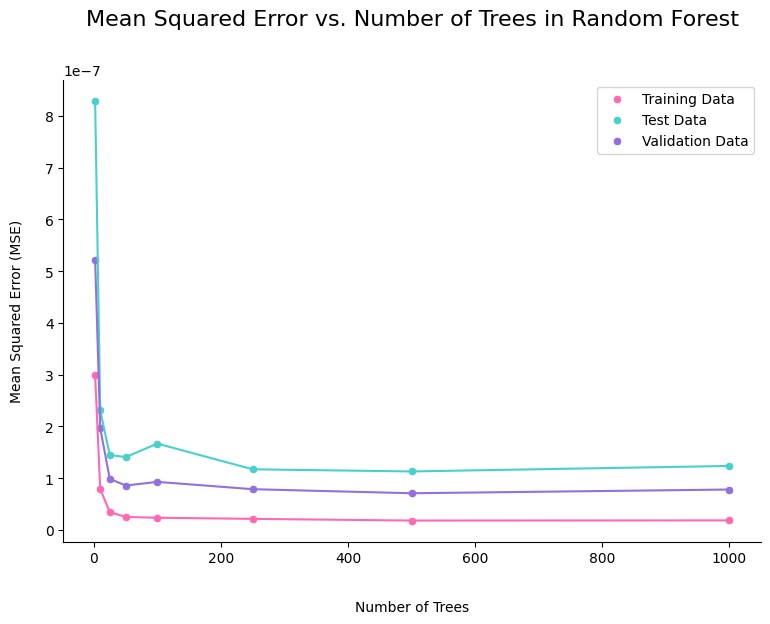

In [38]:
plt.figure(figsize=(9, 6))  # Adjust the figure size as needed
ax = plt.gca()


# scatterplot 
sns.scatterplot(data=mse_train_df, x="Number of Trees", y="Training Data MSE", label='Training Data', color='hotpink')
sns.scatterplot(data=mse_test_df, x="Number of Trees", y="Test Data MSE", label= 'Test Data', color='mediumturquoise')
sns.scatterplot(data=mse_val_df, x="Number of Trees", y="Validation Data MSE", label= 'Validation Data', color='mediumpurple')

# line segments
plt.plot(mse_train_df["Number of Trees"], mse_train_df["Training Data MSE"], linestyle='-', color='hotpink')
plt.plot(mse_test_df["Number of Trees"], mse_test_df["Test Data MSE"], linestyle='-', color='mediumturquoise')
plt.plot(mse_val_df["Number of Trees"], mse_val_df["Validation Data MSE"], linestyle='-', color='mediumpurple')

plt.xlabel('Number of Trees', labelpad=25)
plt.ylabel('Mean Squared Error (MSE)', labelpad=15)
plt.title('Mean Squared Error vs. Number of Trees in Random Forest', y=1.1, fontsize=16)

sns.despine(top=True, right=True)

plt.legend()

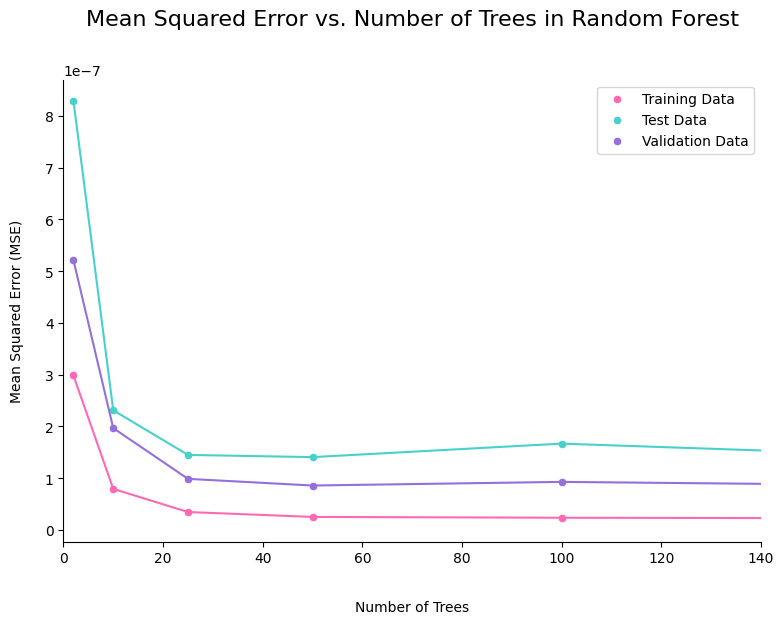

In [39]:
plt.figure(figsize=(9, 6))  # Adjust the figure size as needed
ax = plt.gca()


# scatterplot 
sns.scatterplot(data=mse_train_df, x="Number of Trees", y="Training Data MSE", label='Training Data', color='hotpink')
sns.scatterplot(data=mse_test_df, x="Number of Trees", y="Test Data MSE", label= 'Test Data', color='mediumturquoise')
sns.scatterplot(data=mse_val_df, x="Number of Trees", y="Validation Data MSE", label= 'Validation Data', color='mediumpurple')

# line segments
plt.plot(mse_train_df["Number of Trees"], mse_train_df["Training Data MSE"], linestyle='-', color='hotpink')
plt.plot(mse_test_df["Number of Trees"], mse_test_df["Test Data MSE"], linestyle='-', color='mediumturquoise')
plt.plot(mse_val_df["Number of Trees"], mse_val_df["Validation Data MSE"], linestyle='-', color='mediumpurple')

plt.xlabel('Number of Trees', labelpad=25)
plt.ylabel('Mean Squared Error (MSE)', labelpad=15)
plt.title('Mean Squared Error vs. Number of Trees in Random Forest', y=1.1, fontsize=16)

plt.xlim(0,140)

sns.despine(top=True, right=True)

plt.legend()

# Retraining my actual model, w 25 trees

In [40]:
forest = RandomForestRegressor(n_estimators=25)

In [41]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

# SHAP analysis on the official model

In [42]:
feature_names = ['Barometric Pressure','Carbon Monoxide','Sulfur Dioxide', 'NO$_2$', 'Outdoor Temperature', \
        'Relative Humidity', 'Solar Radiation', 'UV Radiation', 'Oxides of Nitrogen', 'Scalar Wind Direction', \
        'Resultant Wind Direction','Scalar Wind Speed','Resultant Wind Speed','PM2.5', 'Reactive Ox of Nitrogen']

In [43]:
explainer = shap.Explainer(forest)
shap_values = explainer.shap_values(X_test)

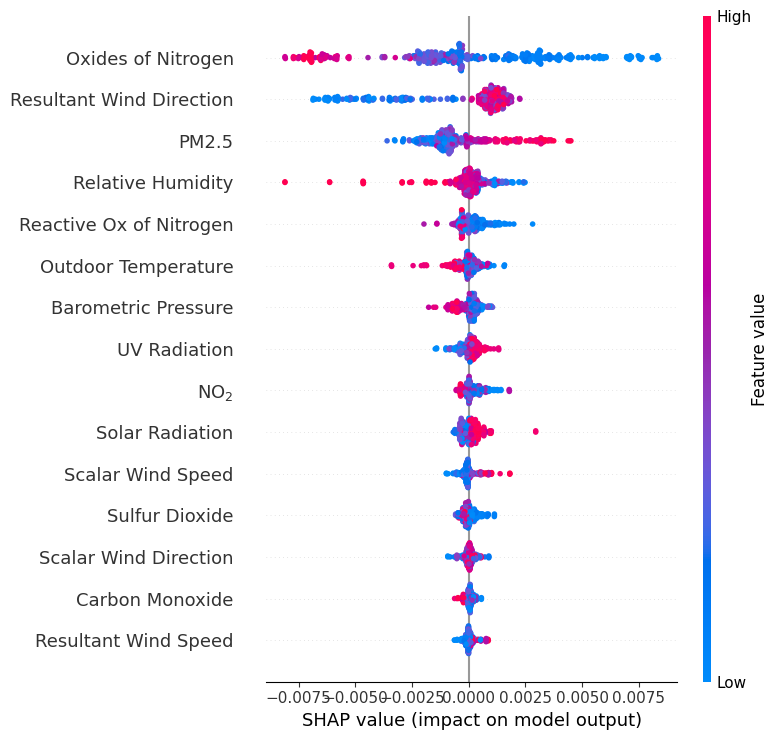

In [44]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

/var/folders/vv/yncyffns1ydg_4gxsbys13v00000gn/T/ipykernel_55285/2402017751.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent label overlap


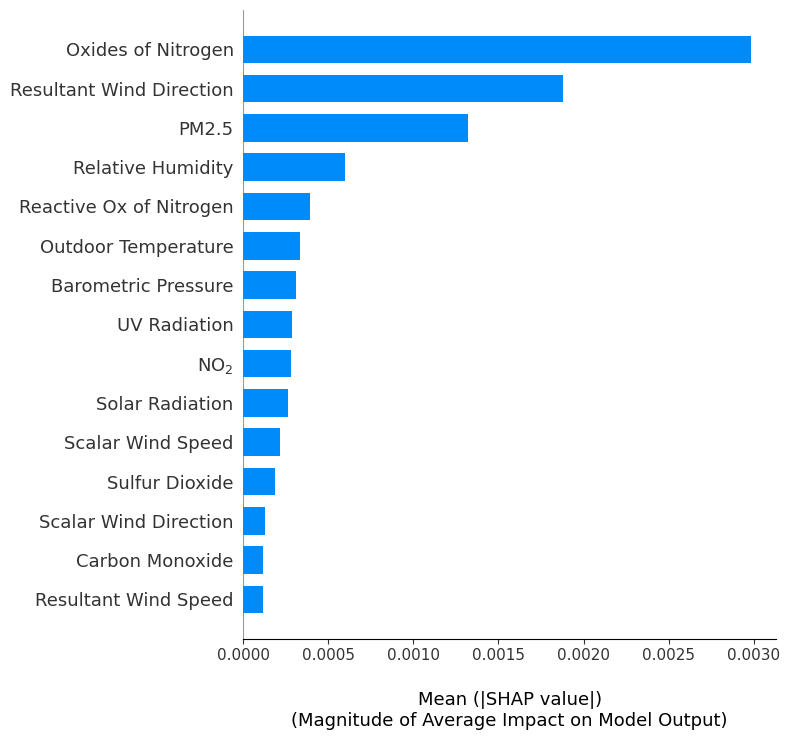

In [45]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar', show=False)

ax = plt.gca()
# trying to move the axis label down bc it's very very close to the plot
ax.set_xlabel('Mean (|SHAP value|)\n(Magnitude of Average Impact on Model Output)', labelpad=20)

plt.tight_layout() 
plt.show()

# Using sklearn SelectFromModel

In [47]:
selector = VarianceThreshold(0.1)  # Set the threshold as desired

# fit
selector.fit(X_train)

# get features
selected_features = np.array(colz)[selector.get_support()]

X_selected = selector.transform(X)


In [48]:
selected_features_mask = selector.get_support()

selected_features = np.array(colz)[selected_features_mask]

print("Selected Features:", selected_features)

Selected Features: ['Barometric Pressure' 'NO2' 'Outdoor Temperature' 'Relative Humidity'
 'Oxides of Nitrogen' 'Scalar Wind Direction' 'Resultant Wind Direction'
 'Scalar Wind Speed' 'Resultant Wind Speed' 'PM2.5'
 'Reactive Ox of Nitrogen']


In [49]:

selector = SelectFromModel(forest, prefit=True)

selected_feature_indices = selector.get_support(indices=True)

# getting selected feature names
selected_features = np.array(colz)[selected_feature_indices]

print("Selected Features:", selected_features)


Selected Features: ['Oxides of Nitrogen' 'Resultant Wind Direction' 'PM2.5']


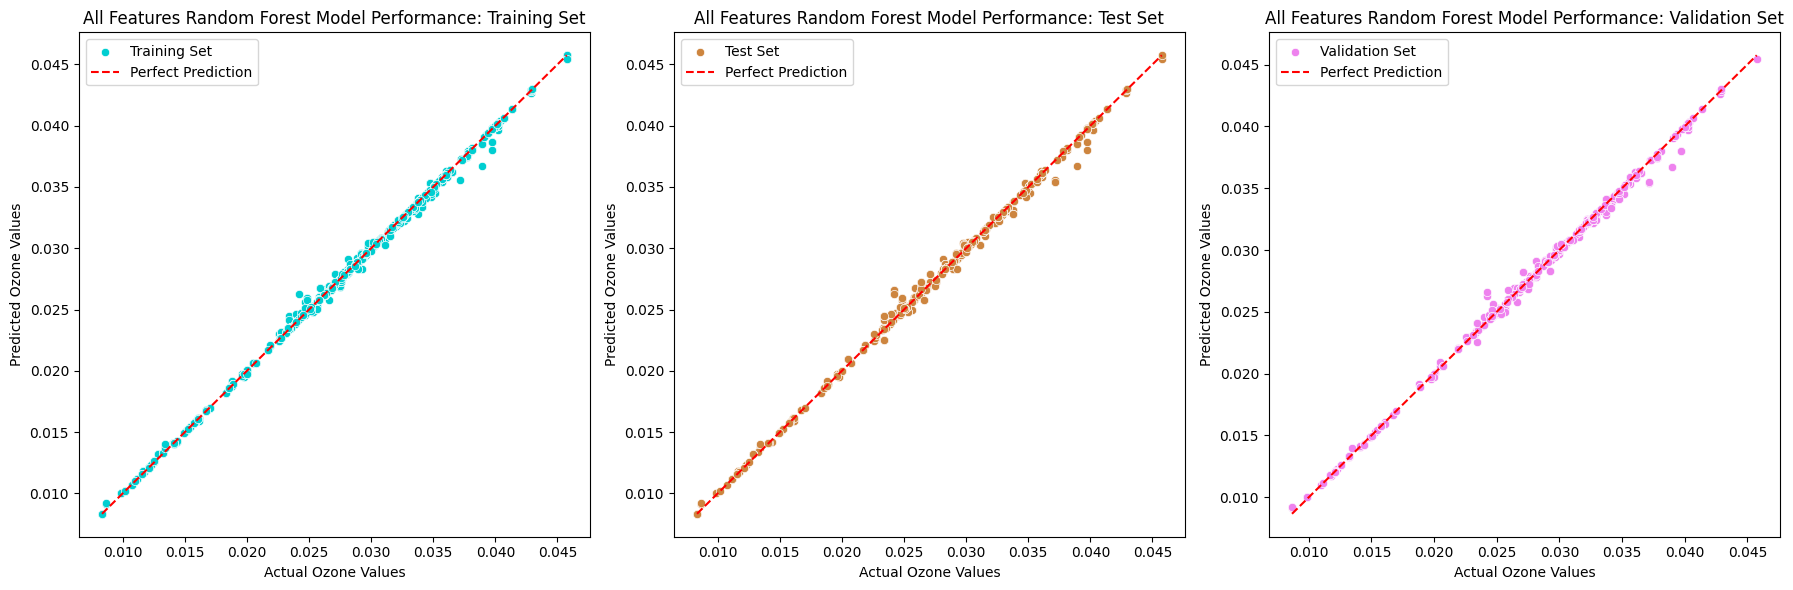

In [54]:
# separate plots for training, test, and validation sets
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# training
sns.scatterplot(x=y_train, y=whPred_train_forest, ax=axes[0], label='Training Set', color='darkturquoise')
axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
axes[0].set_xlabel('Actual Ozone Values')
axes[0].set_ylabel('Predicted Ozone Values')
axes[0].set_title('All Features Random Forest Model Performance: Training Set')
axes[0].legend()

# test
sns.scatterplot(x=y_test, y=whPred_test_forest, ax=axes[1], label='Test Set', color='peru')
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
axes[1].set_xlabel('Actual Ozone Values')
axes[1].set_ylabel('Predicted Ozone Values')
axes[1].set_title('All Features Random Forest Model Performance: Test Set')
axes[1].legend()

# val
sns.scatterplot(x=y_val, y=whPred_val_forest, ax=axes[2], label='Validation Set', color='violet')
axes[2].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Perfect Prediction')
axes[2].set_xlabel('Actual Ozone Values')
axes[2].set_ylabel('Predicted Ozone Values')
axes[2].set_title('All Features Random Forest Model Performance: Validation Set')
axes[2].legend()

plt.tight_layout()
plt.show()

# Making a new model with only the selected features

# Df of only the selected features

In [21]:
dfyo = dfo3.merge(dfnox, on=['date'])
dfya = dfyo.merge(dfno2, on=['date'])
dfyu = dfya.merge(dfpm, on=['date'])
dfa = dfyu.merge(dfwdr, on=['date'])


In [22]:
dfa.head()

,O3,date,Oxides of Nitrogen,NO2,PM2.5,Resultant Wind Direction
0,0.031708,2023-01-01,5.366667,4.816667,5.0875,271.083333
1,0.031708,2023-01-01,5.366667,4.550000,5.0875,271.083333
2,0.031708,2023-01-01,5.366667,4.550000,5.0875,271.083333
3,0.031708,2023-01-01,5.366667,4.816667,5.0875,271.083333
4,0.015792,2023-01-02,21.041667,14.720833,9.1875,102.541667


# New arrays for training the model etc

In [23]:
X = dfa[['Oxides of Nitrogen', 'NO2','PM2.5', 'Resultant Wind Direction']].copy()
X = X.to_numpy()
X


array([[  5.366667,   4.816667,   5.0875  , 271.083333],
       [  5.366667,   4.55    ,   5.0875  , 271.083333],
       [  5.366667,   4.55    ,   5.0875  , 271.083333],
       ...,
       [  8.0375  ,   6.370833,   6.416667, 175.416667],
       [  8.0375  ,   7.3625  ,   6.416667, 175.416667],
       [  8.0375  ,   7.3625  ,   6.416667, 175.416667]])

In [24]:
y = dfa['O3'].copy()
y = y.to_numpy()
y

array([0.031708, 0.031708, 0.031708, ..., 0.030042, 0.030042, 0.030042])

# Train test val split

In [25]:
# training and remaining instead of train and test, remaining will be what i then pull the next stuff from
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4)

# now i can split the remaining data into the testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5)


# X_temp_train is training data, X_test as testing data, X_val is validation data
# y_temp_train is training data, y_test as testing data, y_val is validation data


# Making new dfs for the predictions on each set to go into

In [26]:
colz = ['Oxides of Nitrogen', 'NO2','PM2.5', 'Resultant Wind Direction']

Train_df = pd.DataFrame(X_train, columns=colz)
Train_df['O3 (from y_train)'] = y_train

Test_df = pd.DataFrame(X_test, columns=colz)
Test_df['O3 (from y_test)'] = y_test

Val_df = pd.DataFrame(X_val, columns=colz)
Val_df['O3 (from y_val)'] = y_val

# Training a forest and linear baseline

In [30]:
forest = RandomForestRegressor(n_estimators=25)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

In [32]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

# Adding the predictions to the dfs

In [31]:
# random forest 

# train MSE
whPred_train_forest = forest.predict(X_train)
Train_df['whPred_train_forest'] = whPred_train_forest
forest_train_mse = mean_squared_error(Train_df['O3 (from y_train)'],Train_df['whPred_train_forest'])
print("Random Forest Training MSE:", forest_train_mse)

# test MSE
whPred_test_forest = forest.predict(X_test)
Test_df['whPred_test_forest'] = whPred_test_forest
forest_test_mse = mean_squared_error(Test_df['O3 (from y_test)'],Test_df['whPred_test_forest'])
print("Random Forest Test MSE:", forest_test_mse)


# val MSE
whPred_val_forest = forest.predict(X_val)
Val_df['whPred_val_forest'] = whPred_val_forest
forest_val_mse = mean_squared_error(Val_df['O3 (from y_val)'],Val_df['whPred_val_forest'])
print("Random Forest Validation MSE:", forest_val_mse)

Random Forest Training MSE: 7.542739458264392e-07
Random Forest Test MSE: 4.12869286179439e-06
Random Forest Validation MSE: 4.233341228279073e-06


In [33]:
# linear baseline

# train MSE
whPred_train_lin = lin.predict(X_train)
Train_df['whPred_train_lin'] = whPred_train_lin
lin_train_mse = mean_squared_error(Train_df['O3 (from y_train)'],Train_df['whPred_train_lin'])
print("Linear Baseline Model Training MSE:", lin_train_mse)

# test MSE
whPred_test_lin = lin.predict(X_test)
Test_df['whPred_test_lin'] = whPred_test_lin
lin_test_mse = mean_squared_error(Test_df['O3 (from y_test)'],Test_df['whPred_test_lin'])
print("Linear Baseline Model Test MSE:", lin_test_mse)


# val MSE
whPred_val_lin = lin.predict(X_val)
Val_df['whPred_val_lin'] = whPred_val_lin
lin_val_mse = mean_squared_error(Val_df['O3 (from y_val)'],Val_df['whPred_val_lin'])
print("Linear Baseline Model Validation MSE:", lin_val_mse)

Linear Baseline Model Training MSE: 2.4766371951744344e-05
Linear Baseline Model Test MSE: 1.9901821426856054e-05
Linear Baseline Model Validation MSE: 2.3590128304543686e-05


# Making dfs for the MSEs as well again

In [38]:
mse_almost = mse_train_df.merge(mse_val_df, on=['Number of Trees'])

In [39]:
mse_all = mse_almost.merge(mse_test_df, on=['Number of Trees'])

# Making a big figure with plots comparing the linear and forest performance

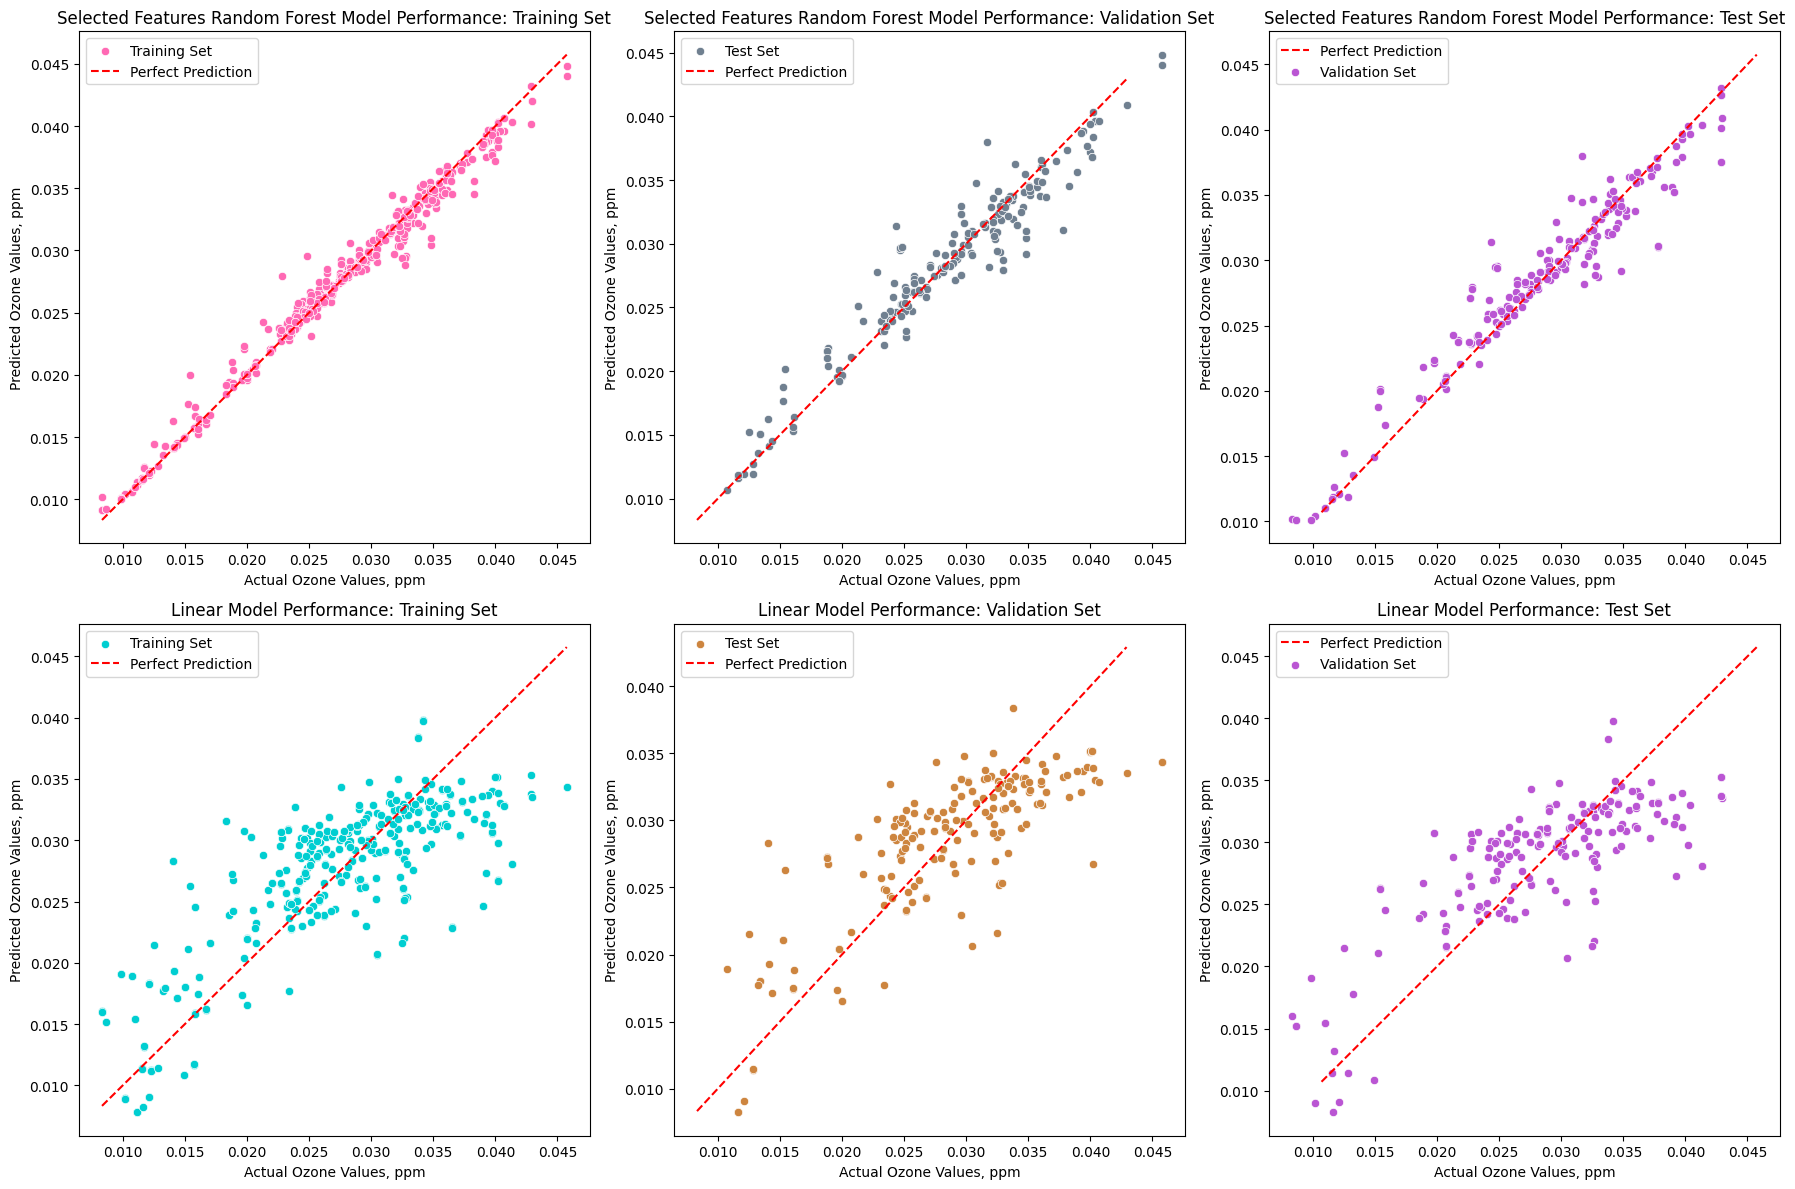

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# random  forest
# train
sns.scatterplot(x=y_train, y=whPred_train_forest, ax=axes[0, 0], label='Training Set', color='hotpink')
axes[0, 0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Ozone Values, ppm')
axes[0, 0].set_ylabel('Predicted Ozone Values, ppm')
axes[0, 0].set_title('Selected Features Random Forest Model Performance: Training Set')
axes[0, 0].legend()

# test
sns.scatterplot(x=y_test, y=whPred_test_forest, ax=axes[0, 1], label='Test Set', color='slategray')
axes[0, 2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
axes[0, 2].set_xlabel('Actual Ozone Values, ppm')
axes[0, 2].set_ylabel('Predicted Ozone Values, ppm')
axes[0, 2].set_title('Selected Features Random Forest Model Performance: Test Set')
axes[0, 2].legend()

# val
sns.scatterplot(x=y_val, y=whPred_val_forest, ax=axes[0, 2], label='Validation Set', color='mediumorchid')
axes[0, 1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Ozone Values, ppm')
axes[0, 1].set_ylabel('Predicted Ozone Values, ppm')
axes[0, 1].set_title('Selected Features Random Forest Model Performance: Validation Set')
axes[0, 1].legend()

# linear
#train
sns.scatterplot(x=y_train, y=whPred_train_lin, ax=axes[1, 0], label='Training Set', color='darkturquoise')
axes[1, 0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Ozone Values, ppm')
axes[1, 0].set_ylabel('Predicted Ozone Values, ppm')
axes[1, 0].set_title('Linear Model Performance: Training Set')
axes[1, 0].legend()

# test 
sns.scatterplot(x=y_test, y=whPred_test_lin, ax=axes[1, 1], label='Test Set', color='peru')
axes[1, 2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
axes[1, 2].set_xlabel('Actual Ozone Values, ppm')
axes[1, 2].set_ylabel('Predicted Ozone Values, ppm')
axes[1, 2].set_title('Linear Model Performance: Test Set')
axes[1, 2].legend()

# val
sns.scatterplot(x=y_val, y=whPred_val_lin, ax=axes[1, 2], label='Validation Set', color='mediumorchid')
axes[1, 1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Ozone Values, ppm')
axes[1, 1].set_ylabel('Predicted Ozone Values, ppm')
axes[1, 1].set_title('Linear Model Performance: Validation Set')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


# Redoing shap so that I have a nice figure with only the selected features and their shap values

In [45]:
explainer = shap.Explainer(forest)
shap_values = explainer.shap_values(X_test)

treex = shap.TreeExplainer(forest)
shap_values2 = treex.shap_values(X_test)

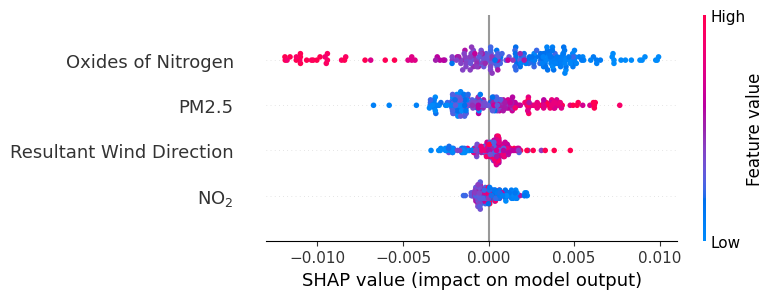

In [47]:
feature_names=['Oxides of Nitrogen', 'NO$_2$','PM2.5', 'Resultant Wind Direction']

shap.summary_plot(shap_values, X_test, feature_names=feature_names)